# Описание проекта
## Задача
Проанализировать истрические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы, выявив определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
## Цели исследования
1. Актуализировать данные, оставив только необходимую для построения прогноза на 2017 год информацию.
2. Выяснить, какие платформы лидируют по продажам, растут или падают, и выберать несколько потенциально прибыльных платформ.
3. Оценить, как влияют на продажи внутри популярных платформ отзывы пользователей и критиков.
4. Выделить самые прибыльные жанры, а также жанры с высокими и низкими продажами.
5. Составить портрет пользователя каждого региона.
6. Проверьте несколько гипотез.

## Ход исследования
1. Загрузка и обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.
6. Общий вывод.

# Загрузка и обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Проведём проверку размерности датасета. Проверим его размер и столбцы.
print('Размер датасета (количество строк, количество столбцов):', df.shape)
print()
print('Столбцы датасета:', df.columns.tolist())

Размер датасета (количество строк, количество столбцов): (16715, 11)

Столбцы датасета: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']


Как мы видим по результатам вывода методов head() и info(), датасет имеет отсутствующие значения, некоторые типы данных требуют форматирования.

На первый взгляд данные представляются понятными и пока что не вызывают вопросов.

# Предобработка данных

In [5]:
# Проверим датасет на наличие явных дубликатов.
df.duplicated().sum()

0

In [6]:
# Булевой маской проверим датафрейм на наличие неявных дубликатов одновременно по имени, платформе и году релиза.
duplicates_mask = df[['Name', 'Platform', 'Year_of_Release']].duplicated()
duplicates = df[duplicates_mask]
duplicates

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [7]:
# Сделаем то же самое, тольк по имени и платформе.
duplicates_mask_2 = df[['Name', 'Platform']].duplicated()
duplicates_2 = df[duplicates_mask_2]
duplicates_2

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Игры с название Need for Speed: Most Wanted вышли и в 2005, и в 2012 годах. А вот Sonic the Hedgehog, как и Madden NFL 13, похожи на неявные дубликата. Убедимся в этом. И при необходимости удалим.

In [8]:
df[(df['Name'] == 'Sonic the Hedgehog') & (df['Platform'] == 'PS3')]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [9]:
df[(df['Name'] == 'Madden NFL 13') & (df['Platform'] == 'PS3')]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Наши опасения подтверждены. Удалим строки с неявными дубликатами.

In [10]:
# Воспользуемся методом drop().
df.drop(index=[4127, 14244, 16230], inplace=True)

# И Cбрасываем индексы.
df.reset_index(drop=True, inplace=True)

## Изменение типа данных

In [11]:
# Изменим названия столбцов, приведя их к нижнему, змеиному_регистру методом str.lower().
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразуем столбец year_of_release к целочисленному формату, сохранив в нём отсутствующие значения. Это нам позволит сделать тип данных Int64. Он не вызовет ошибок из-за отсутствующих значений типа NaN.

С помощью логической индексации заменим значения 'tbd' на константу np.nan, чтобы корректно отобразить пропущенные значения. Коим и является 'tbd'.

И преобразуем столбец в тип float64.

In [12]:
# Приведение year_of_release к целочисленному формату.
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Замена 'tbd' на np.nan.
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

# Преобразование столбца в float64.
df['user_score'] = df['user_score'].astype('float64')

В колонке year_of_release данные были преобразованы к формату Int64 — это представляется единственным вохможным вариантом из доступных в данной ситуации.

В колонке user_score данные были преобразованы к формату float64, так как часть данных была записана числом с плавающей точкой, что неудивительно для пользовательских оценок.

В остальных колнках датасета изменение типа данных не требуется. 

## Обработка пропущенных значений

In [13]:
# Приступим к работе с пропусками.
# Используя сочетание метода isna() и функции sum(), выводим количество пропущенных значений в каждом столбце.
df.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

In [14]:
# Обработает пропуски в столбце rating, поставив на них заглушки — значение 0.
df['rating'].fillna(0, inplace=True)
# И проверим пропуски.
df.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
dtype: int64

In [15]:
# Проверим пропуски в колонках name и genre.
df[['name', 'genre']].isna().sum()

name     1
genre    1
dtype: int64

In [16]:
# Удаляем их.
df.dropna(subset=['name', 'genre'], inplace=True)
# Восстанавливаем индексацию.
df.reset_index(drop=True, inplace=True)

In [17]:
# Проверяем.
df[['name', 'genre']].isna().sum()

name     0
genre    0
dtype: int64

In [18]:
# Проделываем то же самое со столбцом year_of_release.
df['year_of_release'].isna().sum()

268

In [19]:
df.dropna(subset=['year_of_release'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
df['year_of_release'].isna().sum()

0

### Почему не были заполнены пропуски
Пропуски были заполнены только в столбце rating — заглушкой 0. Потому что дэти пропуски несут в себе определённую информацию.

Изучив пропущенные значения в других столбцах было решено не заполнять пропуски. Обоснование следующее.

Заполнить пропуски в столбах name и genre не имеет смысла, так как их всего по два в каждом столбце, а также по причине того, что сделать это средствами Пайтон, на основе текущего датасета — а не поискать в информацию интернете руками — не представляется возможным.

В столбце year_of_release заполнять пропуски не стали по схожей причине: сделать это средствами Пайтон, на основе текущего датасета не представляется возможным.

В столбцах с оценками критиков и пользователей (critic_score и user_score) заполнять пропуски, например, медианой кажется некорректным, потому что подобные оценки не являются взаимозависимыми, каждая отдельная игра, её оценка критиками и пользователями всегда индивидуальна.

### Причины, которые могли привести к пропускам
- Пропуски могли возникнуть из-за ошибок при вводе данных или неполного сбора информации. Например, человеческий фактор, технические проблемы могли стать причиной потери определённой информации о видеоиграх.

- Недоступность информации. Например, данные по старым видеоиграм могли быть потеряны.

- Пропущенные значения по умолчанию. Например, отсутствие оценок у непопулярных игр.

- Отсутствие релевантной информации, как в случае с rating. Некоторые игры просто не помечались рейтингом из-за того, что он действует исключительно в Северной Америке.

### Аббревиатура 'tbd'
Она означает то же пропущенное значение (to be determined (tbd), «подлежит уточнению»), чаще всего используется как раз в игровой индустрии.

Аббревиатура была заменена на np.nan ещё на этапе изменения типа данных, ведь её присутствие в столбце с числовыми значениями превращало тип данных столбца в object, а не float, как оно следовало бы. Это было исправлено.

In [21]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец — total_sales.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Выводы
В датасете не было найдено явных дубликатов, но были обнаружены и удалены два неявных.

В двух столбцах — year_of_release и user_score — был преобразован тип данных.

Были удалены пропуски в столбцах name, genre, year_of_release.

Изучив пропущенные значения в столбцах было решено не заполнять пропуски, за исключением столюца rating, где были поставлены заглушки (0).

Аббревиатура 'tbd' была заменена на np.nan

# Исследовательский анализ данных

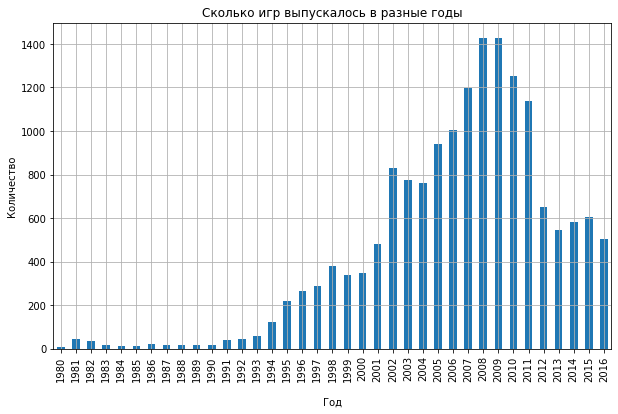

In [23]:
# Воспользуемся методами value_counts() и sort_index(), чтобы посмотреть, сколько игр выпускалось в разные годы.
# И построим столбчатую диаграмму (bar) на основе данных выше.
(
    df['year_of_release']
    .value_counts()
    .sort_index()
    .plot(kind='bar',
          figsize=(10, 6),
          rot=90,
          legend=False,
          grid=True)
)

plt.title('Сколько игр выпускалось в разные годы', fontsize=12)
plt.xlabel('\nГод', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.show()

### Важны ли данные за все периоды
Опираясь на код в ячейке выше, делаем предположение, что наиболее актуальными являются игры, выпущенные не раньше 2000 года — просто по количеству. Или же даже с 2006 года. На данный момент ясно, что данные за все годы не нужны.

Однако очевидно, что пока что данных недостаточно для того, чтобы сделать какие-то выводы на этот счёт и сформировать выборку. Например, нужно взять в расчёт сроки жизни одного поколения платформ — игровых приставок. Это важный показатель.

In [24]:
# В данных по платформе Nintendo DS обнаружилась ошибка.
# В строке 15704 указан 1985 год, хотя портативная приставка вышла только в 2004.
df.loc[df['platform'] == 'DS', 'year_of_release'].sort_values()

15704    1985
13253    2004
11339    2004
4360     2004
7778     2004
         ... 
7341     2013
14484    2013
7869     2013
3810     2013
4983     2013
Name: year_of_release, Length: 2121, dtype: Int64

In [25]:
# Посмотрим на эту строку.
df.loc[15704]

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   1985
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                       NaN
user_score                                         NaN
rating                                               0
total_sales                                       0.02
Name: 15704, dtype: object

In [26]:
# И удалим её методом drop().
df.drop(index=15704, inplace=True)

# И сбросим индексы.
df.reset_index(drop=True, inplace=True)

### Как менялись продажи по платформам

Медиана жизненного цикла платформ: 7 лет


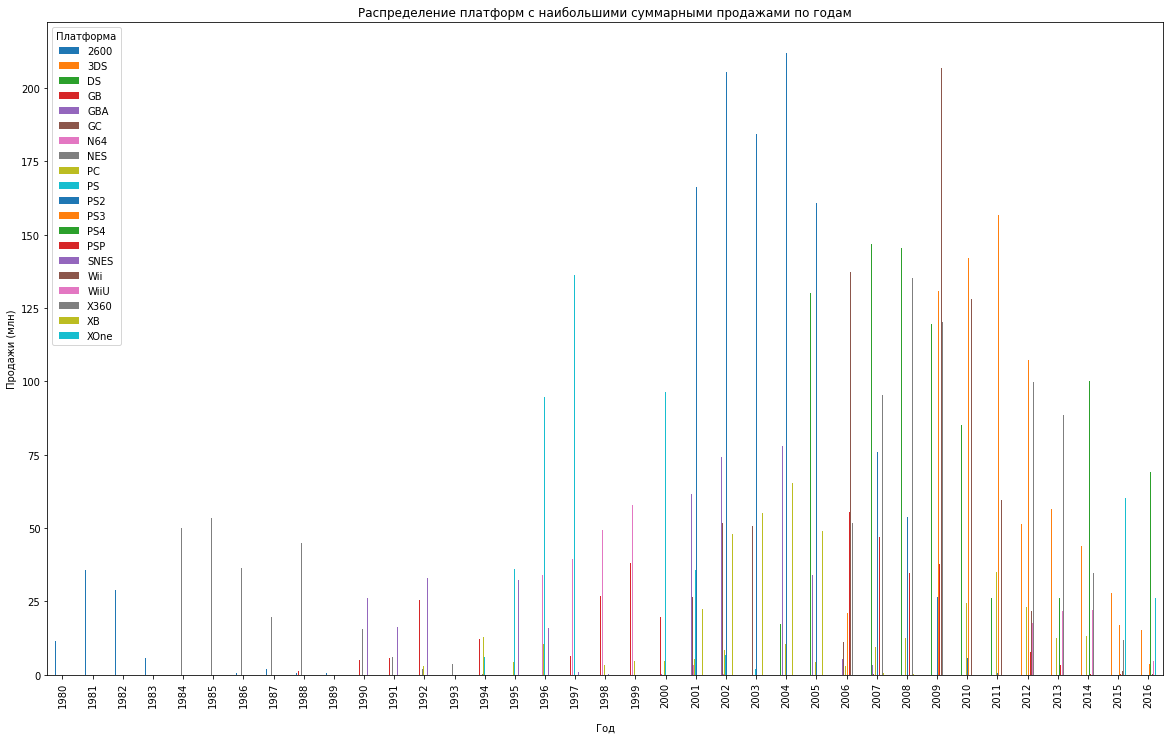

In [27]:
# Выберем топ-20 платформ с наибольшими суммарными продажами с помощью nlargest() и groupby().
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(20).index

# Построим распределение по годам продаж для топ-20 платформ.
# Сделаем это с помощью метода isin() и сводной таблицы.
sales_by_year_platform = (
    df[df['platform'].isin(top_platforms)]
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='total_sales',
                 aggfunc='sum')
)

# На её основе построим гистограмму.
sales_by_year_platform.plot(kind='bar', figsize=(20, 12))

plt.title('Распределение платформ с наибольшими суммарными продажами по годам')
plt.xlabel('\nГод')
plt.ylabel('Продажи (млн)')
plt.legend(title='Платформа')

# С помощью pivot_table() подсчитаем характерный срок, за который появляются новые и исчезают старые платформы.
platform_lifecycle = (
    df
    .pivot_table(index='platform',
                values='year_of_release',
                aggfunc=['min', 'max'])
    .reset_index()
)

platform_lifecycle['life'] = platform_lifecycle['max'] - platform_lifecycle['min'] + 1

# Выводим на экран медиану жизненного цикла платформ.
print(f"Медиана жизненного цикла платформ: {round(platform_lifecycle['life'].median())} лет")
# И график.
plt.show()

In [28]:
# Теперь проверим актуальность платформ (количество на них релизов, начиная с 2014 года) с помощью метода value_counts().
df.loc[df['year_of_release'] > 2013, 'platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

Исходя из полученных данных, можно сказать, что средний жизненный цикл платформы составляет 10 лет — по грубой оценке. Потому что в последние годы жизни платформы продажи существенно падают. Активным жизненным циклом платформы можно считать срок 7 лет. Исключение — PC.

Основной фактор формирования выборки — данные должны помочь построить прогноз на 2017 год. Поэтому мы должны будем ограничиться исключительно теми платформами, которые на 2016 год являются актуальными. Отталкиваясь от кода в ячейке выше, а также от понимания, когда сменилось поколение игровых платформ (в конце 2013-го), будем считать, что актуальными для нас будут данные, начиная с 2014 года.

In [29]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

### Актуализация данных в датафрейме

In [30]:
# Проведём проверку размерности датафрейма до актуализации данных.
# Чтобы обеспечить корректность операций с данными и предотвратить потенциальные ошибки.
# Проверим размеры и столбцы датафрейма до его изменения.
print('Размер датафрейма до актуализации данных:', df.shape)
print()
print('Столбцы датафрейма до актуализации данных:', df.columns.tolist())
# И выведем его на экран
df

Размер датафрейма до актуализации данных: (16442, 12)

Столбцы датафрейма до актуализации данных: ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16438,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,0,0.01
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,0,0.01


In [31]:
# Прибегнем к логическому индексированию для создания нового датафрейма с нужными для нас данными.
old_data = df['year_of_release'] < 2014
# На всякий случай сохраним старый датасет в переменной old_df.
old_df = df
# Новый передадим привычной переменной df.
df = df[~old_data]
# И методом reset_index() сбросим индексацию.
df.reset_index(drop=True, inplace=True)

In [32]:
# Проведём проверку размерности актуализированного датасета. Так же проверим размер и столбцы.
print('Размер актуализированного датасета (количество строк, количество столбцов):', df.shape)
print()
print('Столбцы актуализированного датасета:', df.columns.tolist())

# И выведем на экран получившийся датасет.
df

Размер актуализированного датасета (количество строк, количество столбцов): (1689, 12)

Столбцы актуализированного датасета: ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,0,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,0,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01


### Какие платформы лидируют по продажам, растут или падают

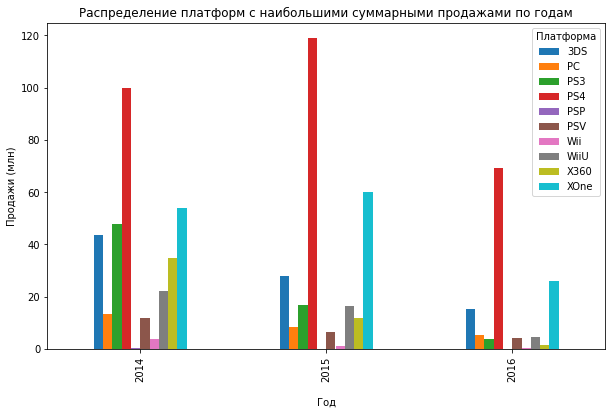

In [33]:
# Ещё раз построим гистограмму с наибольшими суммарными продажами по платформам, но уже для актуализированного датафрейма.
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(10).index

sales_by_year_platform = (
    df[df['platform'].isin(top_platforms)]
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='total_sales',
                 aggfunc='sum')
)

sales_by_year_platform.plot(kind='bar', figsize=(10, 6))

plt.title('Распределение платформ с наибольшими суммарными продажами по годам')
plt.xlabel('\nГод')
plt.ylabel('Продажи (млн)')
plt.legend(title='Платформа')

plt.show()

2016 год сопоставим по объёму вышедших игр с предыдущими, но выглядит как провальный по сравнению с 2015-м. Поэтому на основании данной выборки можно говорить о падении продаж видеоигр в 2016 году относительно прошлых лет.

По продажам очевидно доминирование PS4. На втором месте Xbox One, на третьем — портативная 3DS. То есть среди лидеров по продажам — новые платформы.

Они же и демонстрировали рост до 2016 года.

Падают старые платформы, PS3 и Xbox 360, И PC. Что, впрочем, можно объяснить ростом мультиплеерной составляющей: игра покупается один (если покупает вообще), играют в неё долго, совершая покупки «внутри». Также падают продажи для портативных консолей (кроме 3DS) и WiiU. В случае последней можно говорить в принципе о провале игровой платформы как таковой.

### Глобальные продажи игр в разбивке по платформам

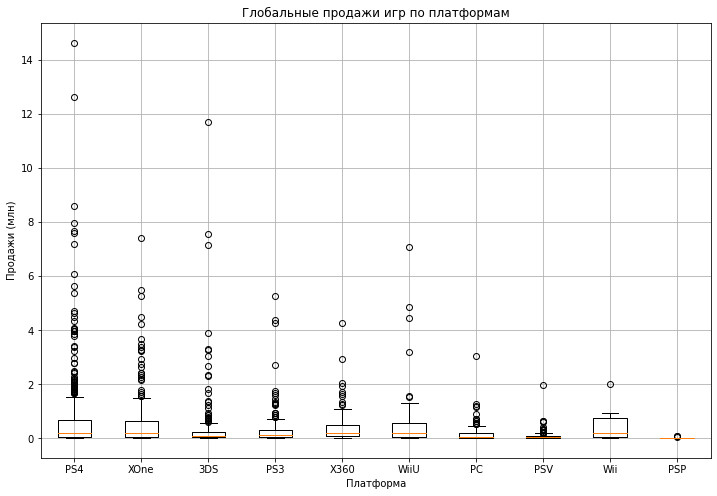

In [34]:
# Сгруппируем данные по платформам и глобальным продажам и отсортируем их.
platform_sales = df.groupby('platform')['total_sales'].sum()
platform_sales = platform_sales.sort_values(ascending=False).index

# Создадим график типа boxplot («ящик с усами»).
plt.figure(figsize=(12, 8))
plt.boxplot([df[df['platform'] == platform]['total_sales'] for platform in platform_sales], labels=platform_sales)

plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн)')
plt.grid(True)

plt.show()

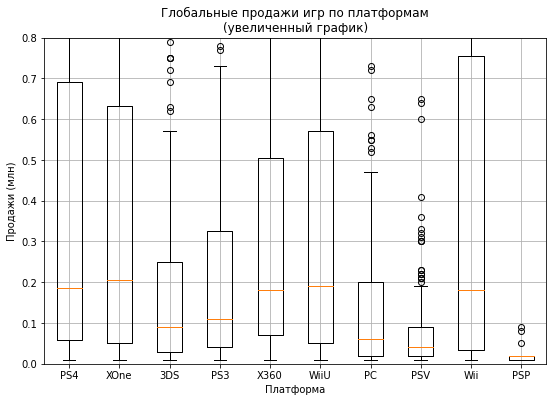

In [35]:
# Увеличим график, чтобы лучше рассмотреть боксы.
plt.figure(figsize=(9, 6))
plt.boxplot([df[df['platform'] == platform]['total_sales'] for platform in platform_sales], labels=platform_sales)

plt.title('Глобальные продажи игр по платформам\n(увеличенный график)')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн)')
plt.ylim(0, 0.8)
plt.grid(True)

plt.show()

Первое, что мы видим, — большое количество выбросов. В данном случае это самые продаваемые игры. Они и делают основную часть продаж. Особенно это видно на первых трёх боксплотах. Значит, большие продажи отдельных игр на данных платформах могут быть обусловлены и эсклюзивными играми.

Далее обратим внимание на медианы боксплотов. Медианы PS4, Xbox One, Xbox 360, WiiU и Wii примерно равны — они находятся в районе 200 тыс. У остальных платформ медианы существенно меньше.

Посмотрим на верхние квантили (0,75-квантили) «яшиков с усами». Самые стабильные результаты у Wii: 75% игр продаются в границе, верхний предел которой находится в районе 750 тыс. копий. Затем идут PS4 (около 695 тыс.), Xbox One (625 тыс.), WiiU (575 тыс.) и Xbox 360 (500 тыс.). 

Ограниченный разброс. Усы у графиков достаточно узкие. То есть большинство значений сконцентрированы в узком диапазоне. Это может говорить о том, что данные имеют ограниченный разброс, меньшую вариацию.

### Как влияют на продажи внутри популярной платформы отзывы пользователей и критиков

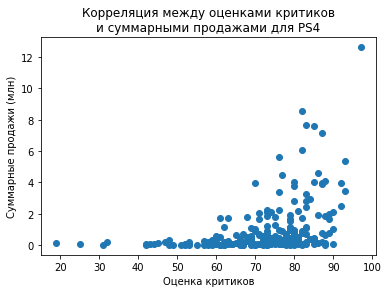

Корреляция между оценками критиков и суммарными продажами для PS4: 0.40266141068104083


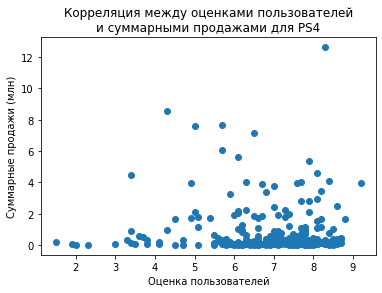

Корреляция между оценками пользователей и суммарными продажами для PS4: -0.040131589472697356


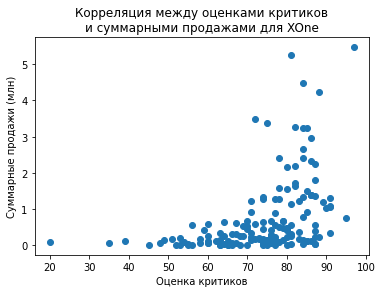

Корреляция между оценками критиков и суммарными продажами для XOne: 0.42867694370333226


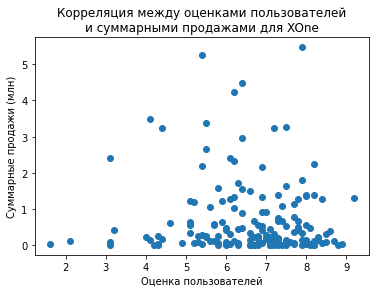

Корреляция между оценками пользователей и суммарными продажами для XOne: -0.0703839280647581


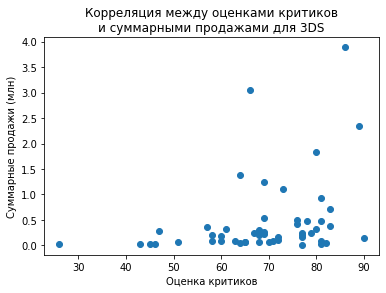

Корреляция между оценками критиков и суммарными продажами для 3DS: 0.314117492869051


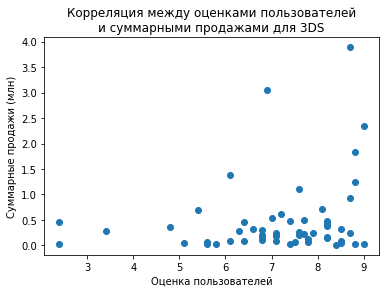

Корреляция между оценками пользователей и суммарными продажами для 3DS: 0.2151932718527028


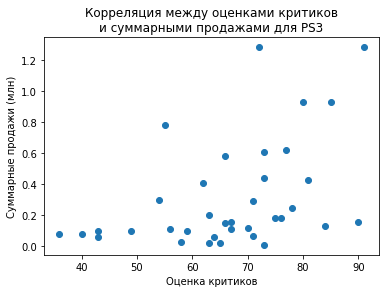

Корреляция между оценками критиков и суммарными продажами для PS3: 0.44657460493190704


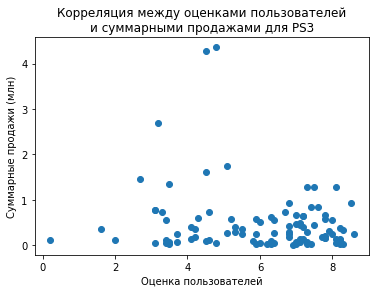

Корреляция между оценками пользователей и суммарными продажами для PS3: -0.16676141347662118


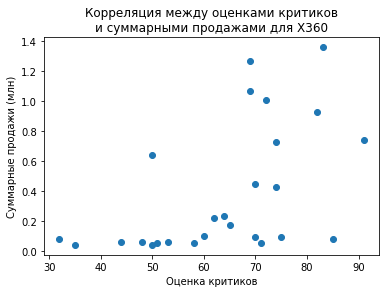

Корреляция между оценками критиков и суммарными продажами для X360: 0.5257228356581523


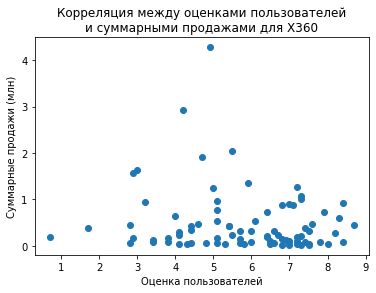

Корреляция между оценками пользователей и суммарными продажами для X360: -0.138444570945665


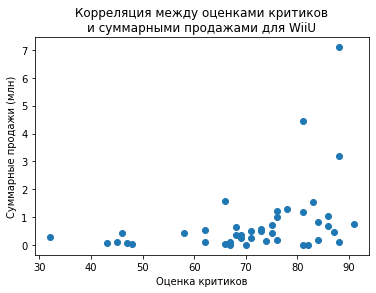

Корреляция между оценками критиков и суммарными продажами для WiiU: 0.370201412480884


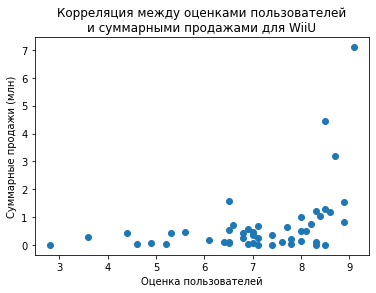

Корреляция между оценками пользователей и суммарными продажами для WiiU: 0.40792645792170773


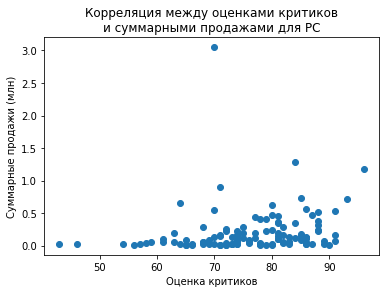

Корреляция между оценками критиков и суммарными продажами для PC: 0.17463413769350036


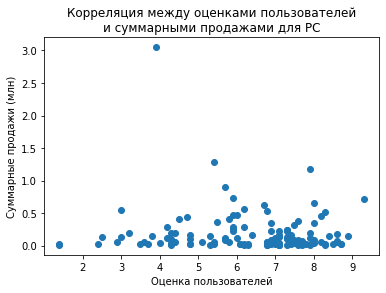

Корреляция между оценками пользователей и суммарными продажами для PC: -0.07159665703472451


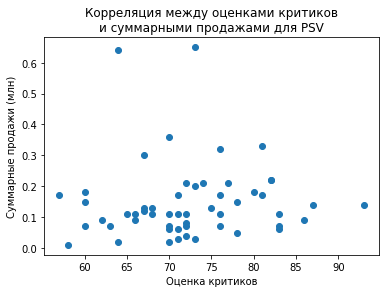

Корреляция между оценками критиков и суммарными продажами для PSV: 0.04266490657009526


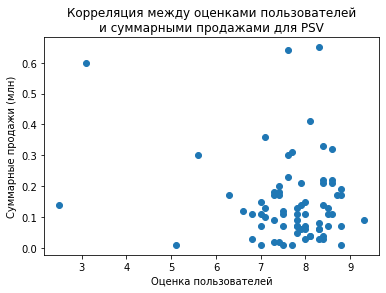

Корреляция между оценками пользователей и суммарными продажами для PSV: -0.16845504978064446


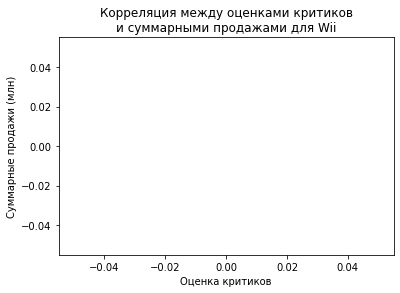

Корреляция между оценками критиков и суммарными продажами для Wii: nan


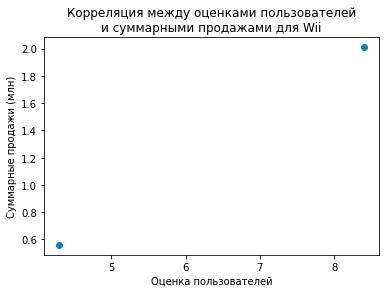

Корреляция между оценками пользователей и суммарными продажами для Wii: 1.0


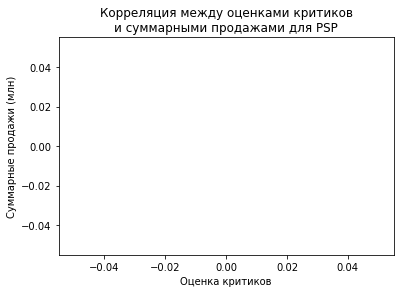

Корреляция между оценками критиков и суммарными продажами для PSP: nan


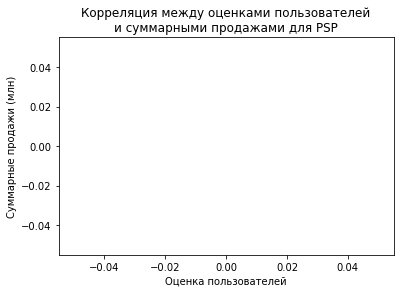

Корреляция между оценками пользователей и суммарными продажами для PSP: nan


In [36]:
# Сформируем перечень платформ для перебора в цикле.
platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index

# Цикл для построения графиков для каждой платформы.
for platform in platforms:
    # Срез данных для каждой из платформ.
    platform_data = df[df['platform'] == platform]

    # Данные об оценках критиков, пользователей и суммарных продажах.
    critic_score = platform_data['critic_score']
    user_score = platform_data['user_score']
    total_sales = platform_data['total_sales']

    # График рассеяния для оценок критиков и суммарных продаж.
    plt.scatter(critic_score, total_sales)
    plt.title(f'Корреляция между оценками критиков\nи суммарными продажами для {platform}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Суммарные продажи (млн)')
    plt.show()

    # Коэффициент корреляции для оценок критиков и суммарных продаж.
    corr_critic = critic_score.corr(total_sales)
    print(f'Корреляция между оценками критиков и суммарными продажами для {platform}:', corr_critic)

    # График рассеяния для оценок пользователей и суммарных продаж.
    plt.scatter(user_score, total_sales)
    plt.title(f'Корреляция между оценками пользователей\nи суммарными продажами для {platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Суммарные продажи (млн)')
    plt.show()

    # Коэффициент корреляции для оценок пользователей и суммарных продаж.
    corr_user = user_score.corr(total_sales)
    print(f'Корреляция между оценками пользователей и суммарными продажами для {platform}:', corr_user)

#### PS4
Коэффициент -0.04013158947269732 говорит, что существует очень слабая, но отрицательная корреляция между оценкой пользователей и суммарными продажами. То есть при увеличении одной переменной, другая будет иметь тенденцию к уменьшению, и наоборот.

Точки на графике в основном равномерно сгруппированны в зоне игр с рейтингом от 5.5 до чуть более 8.5 и суммарными продажами в районе до примерно 500 тыс. и не имеют чёткой тенденции направления взаимовсязи двух переменных, однако визуально также прослеживается отрицательная корреляция переменных — точки на графике умеренно стремятся в верхний левый угол.

Коэффициент 0.4026614106810408 говорит, что существует умеренная положительная корреляция между оценкой критиков и суммарными продажами. То есть при увеличении одной переменной, другая также будет иметь тенденцию к увеличению, и наоборот.

Точки на графике в основном сгруппированны в зоне игр с рейтингом от 70 до чуть более 80 и суммарными продажами в районе до меньше 1 млн и имеют умеренную тенденцию направления взаимовсязи двух переменных, стремясь на графике в верхний правый угол.
#### Xbox One
Исходя из коэффициента корреляции и графика, в случае Xbox One и оценок пользователей можно сказать то же самое, что и в случае с PS4. То же можно сказать и про оценки критиков: коэффициент и график с данными по Xbox One схожи с PS4.

В целом, в случае PS4 и Xbox One, они же самые популярные платформы по количеству проданных игр, можно говорить о наличии чёткой тенденции к, во-первых, лёгкой отрицательной корреляции между продажами и оценками пользователей, и, во-вторых, умеренной положительной корреляции между продажами и оценками критиков.
#### 3DS
3DS неожиданно имеет небольшую положительную корреляцию между оценками пользователей и суммарными продажами. Это нетипично по сравнению с двуям предыдущими платформами. Однако здесь играют роль два фактора. Во-первых меньшее количество значений в наборе (меньше игр). Во-вторых, возможная специфика портативной платформы.

Корреляция в случае оценок критиков в меньшей степени, но примерно также демонстрирует то же, что и с примерах с PS4 и Xbox One.

#### Остальные платформы
Для остальных платформ характерна такая же корреляция: оценки пользователей — лёгкая отрицательная, оценки критиков — лёгкая положительная. Выделяется WiiU, для которой, однако, характерна схожая с 3DS по обоим показателям корреляция. Для некоторых платформ графики не получились — из-за отсутствия достаточного количества данных.

### Общее распределение игр по жанрам


Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные и жанры с низкими продажами.

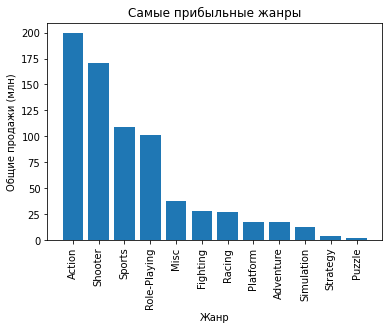

In [37]:
# Сгруппируем и отсоритируем данные по жанру и суммируем продажи.
genre_sales_sum = (
    df.groupby('genre')
    ['total_sales']
    .sum()
    .sort_values(ascending=False)
)

# Построим столбчатую диаграмму на их основе.
plt.bar(genre_sales_sum.index, genre_sales_sum.values)
plt.xlabel('Жанр')
plt.ylabel('Общие продажи (млн)')
plt.title('Самые прибыльные жанры')
plt.xticks(rotation=90)
plt.show()

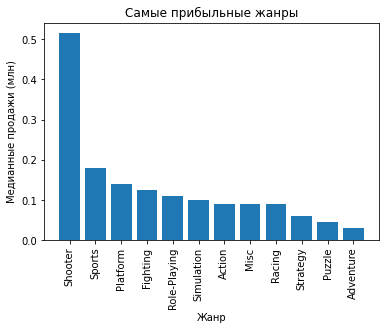

In [38]:
# Посмотрим на медианные продажи.
genre_sales_median = (
    df.groupby('genre')
    ['total_sales']
    .median()
    .sort_values(ascending=False)
)

# Построим столбчатую диаграмму на их основе.
plt.bar(genre_sales_median.index, genre_sales_median.values)
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи (млн)')
plt.title('Самые прибыльные жанры')
plt.xticks(rotation=90)
plt.show()

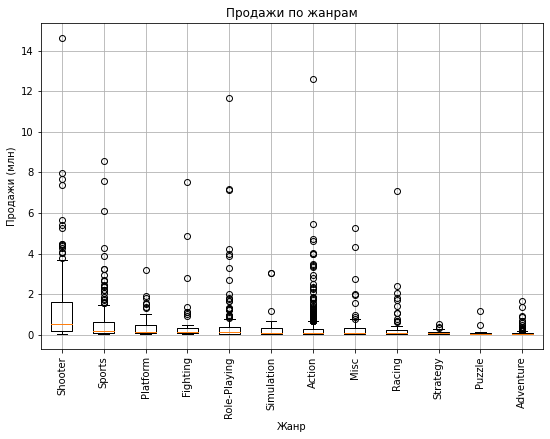

In [39]:
# Дополнительно построим диаграммы размаха для жанров.
genre_sales_median_data = genre_sales_median.sort_values(ascending=False).index

plt.figure(figsize=(9, 6))
plt.boxplot(
    [df[df['genre'] == genre]['total_sales'] for genre in genre_sales_median_data],
    labels=genre_sales_median_data
)

plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

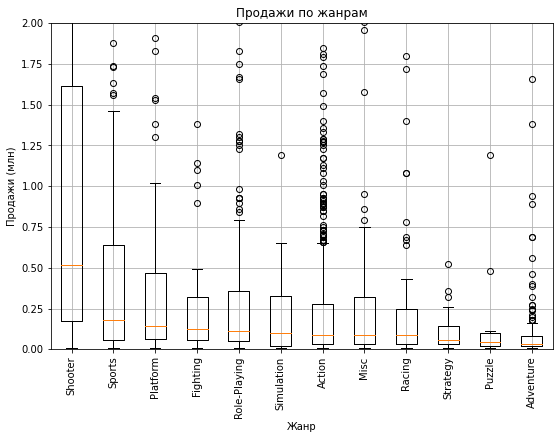

In [40]:
# Увеличим график.
genre_sales_median_data = genre_sales_median.sort_values(ascending=False).index

plt.figure(figsize=(9, 6))
plt.boxplot(
    [df[df['genre'] == genre]['total_sales'] for genre in genre_sales_median_data],
    labels=genre_sales_median_data
)

plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн)')
plt.ylim(0, 2)
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

Таким образом, самые прибыльные стабильные жанры — Shooter, Sports, Platform, Fighting, RPG и Simulation. При этом Shooter лидирует с большим отрывом. Самые стабильно неприбыльные — Strategy, Puzzle и Adventure.

# Портрет пользователя каждого региона

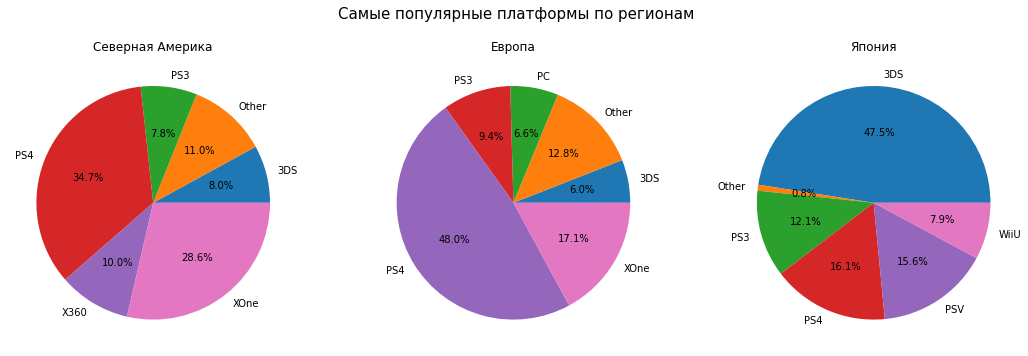

In [41]:
# Сгруппируем данные по регионам и платформам, выделив топ-5 самых популярных.
top_platforms_na = df.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().nlargest(5)

# Создадим категории платформ по регионам.
platform_category_na = df['platform'].copy()
platform_category_na[~df['platform'].isin(top_platforms_na.index)] = 'Other'

platform_category_eu = df['platform'].copy()
platform_category_eu[~df['platform'].isin(top_platforms_eu.index)] = 'Other'

platform_category_jp = df['platform'].copy()
platform_category_jp[~df['platform'].isin(top_platforms_jp.index)] = 'Other'

# Сруппируем данные по категориям платформ и подсчитаем суммарные продажи по регионам.
sales_by_platform_na = df.groupby(platform_category_na)['na_sales'].sum()
sales_by_platform_eu = df.groupby(platform_category_eu)['eu_sales'].sum()
sales_by_platform_jp = df.groupby(platform_category_jp)['jp_sales'].sum()

# Построим круговые диаграммы.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Самые популярные платформы по регионам\n', fontsize=15)

sales_by_platform_na.plot(kind='pie',
                          ax=axes[0],
                          # Зададим формат вывода процентного значения для долей.
                          autopct='%1.1f%%',
                          colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2'])
axes[0].set_title('Северная Америка')
axes[0].set_ylabel('')

sales_by_platform_eu.plot(kind='pie',
                          ax=axes[1],
                          autopct='%1.1f%%',
                          colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2'])
axes[1].set_title('Европа')
axes[1].set_ylabel('')

sales_by_platform_jp.plot(kind='pie',
                          ax=axes[2],
                          autopct='%1.1f%%',
                          colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2'])
axes[2].set_title('Япония')
axes[2].set_ylabel('')

# Вызовем функцию plt.tight_layout(), чтобы избежать перекрытия и обеспечить лучшую видимость и читаемость графиков.
plt.tight_layout()
plt.show()

PS4 является самой популярной платформой в общемировом разрезе, а также на рынках Северной Америки и Европы. На рынке последней её отрыв существенно велик. В Северной Америке ощущается региональная специфика: Xbox One популярен на родине, хоть и уступает PS4. Ещё сильнее региональная специфика продемонстрирована на рынке Японии. Топ-5 платформ состоит исключительно из японских консолей, в лидерах — 3DS. Это может объяснять её третью позицию по продажам игр в мире.

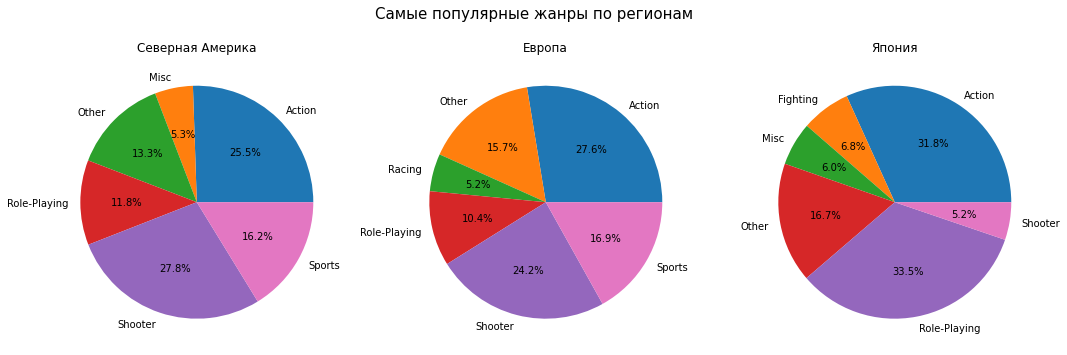

In [42]:
# Проделаем те же операции для жанров.
top_genres_na = df.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5)

genre_category_na = df['genre'].copy()
genre_category_na[~df['genre'].isin(top_genres_na.index)] = 'Other'

genre_category_eu = df['genre'].copy()
genre_category_eu[~df['genre'].isin(top_genres_eu.index)] = 'Other'

genre_category_jp = df['genre'].copy()
genre_category_jp[~df['genre'].isin(top_genres_jp.index)] = 'Other'

sales_by_genre_na = df.groupby(genre_category_na)['na_sales'].sum()
sales_by_genre_eu = df.groupby(genre_category_eu)['eu_sales'].sum()
sales_by_genre_jp = df.groupby(genre_category_jp)['jp_sales'].sum()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Самые популярные жанры по регионам\n', fontsize=15)

sales_by_genre_na.plot(kind='pie',
                       ax=axes[0],
                       autopct='%1.1f%%',
                       colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2'])
axes[0].set_title('Северная Америка')
axes[0].set_ylabel('')

sales_by_genre_eu.plot(kind='pie',
                       ax=axes[1],
                       autopct='%1.1f%%',
                       colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2'])
axes[1].set_title('Европа')
axes[1].set_ylabel('')

sales_by_genre_jp.plot(kind='pie',
                       ax=axes[2],
                       autopct='%1.1f%%',
                       colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2'])
axes[2].set_title('Япония')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

На рынках Северной Америки и Европы достаточно схожая ситуация. Лидирующие позиции у жанров, занимающих первые места и в общемировых продажах.

Иная ситуация в Японии. Там в лидерах оказался популярный в мире, но находящийся не на первом месте жанр RPG. Ещё одно доказательство специфичности японского рынка.

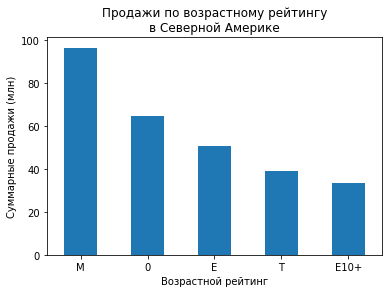

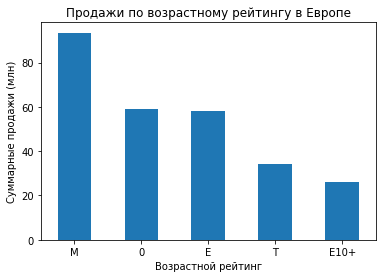

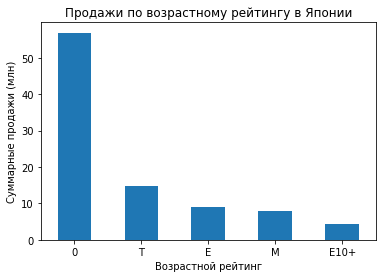

In [43]:
# Построим столбчатые диаграммы для возрастных рейтингов.
na_rating_sales = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating_sales = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating_sales = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

na_rating_sales.plot(kind='bar')
plt.title('Продажи по возрастному рейтингу\nв Северной Америке')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=0)
plt.show()

eu_rating_sales.plot(kind='bar')
plt.title('Продажи по возрастному рейтингу в Европе')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=0)
plt.show()

jp_rating_sales.plot(kind='bar')
plt.title('Продажи по возрастному рейтингу в Японии')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=0)
plt.show()

Значительная часть игр без рейтинга. В Японии — большая часть. Причина — применение рейтинговой системы исключительно в Северной Америке.

Европа и Северная Америка вновь похожи в предпочтениях. На первом месте — игры для взрослой аудитории. В Японии — большая часть игр без рейтинга, затем идут игры для тинейджеров. На третьем месте везде игры для пользователей от 10 лет.

Соответственно, в Северной Америке и Европе возрастные рейтинги не оказывают влияния на продажи, а в Японии — оказывают. Предположительно потому, что на рынке действует определённая специфика, которая может оказывать влияние и в этом аспекте. Например, игры от Nintendo традиционно не славятся жестокостью и шокирующими сценами. Причина, скорее всего, кроется в жёсткой рейтинговой системе в стране, которая присваивает играм для взрослой аудитории высокий рейтинг, который не присутствует в данном наборе данных. Эту специфику рынка также стоит учитывать.

In [44]:
# Комментарий ревьюера
temp = df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


0       749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

Таким образом, следует применить для проверки гипотезы t-тест для независимых выборок, потому что мы имеем дело с двумя несвязанными между собой группами пользователей — Xbox One и PC.

В данной гипотезе мы предполагаем, что средние пользовательские рейтинги для двух платформ (Xbox One и PC) одинаковы, так как нулевая гипотеза формулируется с учётом отсутствия различий между выборками данных.

In [45]:
# Соберём данные для Xbox One и PC с помощью логической индексации.
user_score_xone = df[df['platform'] == 'Xone']['user_score']
user_score_pc = df[df['platform'] == 'PC']['user_score']

# Зададим уровень статистической значимости, исходя из небольшого размера выборки.
alpha = 0.05

# Запускаем t-тест для двух независимых генеральных совокупностей — user_score_xone и user_score_pc.
# Алтернативная гипотеза двустороняя, поэтому параметр alternative функции ttest_ind указывать необязательно.
# Он по умолчанию равен two-sided.
# Предварительно проверив ожидаемую размерность, применим к Series метод dropna(), чтобы избавиться от пропущенных значений.
results = st.ttest_ind(user_score_xone.dropna(), user_score_pc.dropna())
print('p-значение:', results.pvalue)

# Сравниваем полученное в результате t-теста значение p-value с уровнем статистической значимости.
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые.')
else:
    print('Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.')

p-значение: nan
Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


p-значение равное 0.10450507919348415 говорит о том, что у нас нет статистически значимымых доказательств, позволяющих отвергнуть нулевую гипотезу. При этом есть вероятность 10.45%, что наблюдаемое различие в выборках может быть получено случайно.

Однако можно сказать, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

## Средние пользовательские рейтинги жанров Action и Sports разные
Сформулируем нулевую и альтернативную гипотезы, где:

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Здесь также кажется верным применить t-тест для независимых выборок.

Нулевая гипотеза сформулирована с учетом отсутствия различий или эффекта между выборками.

In [46]:
# Повторим примерно то же, что и в коде выше.
user_score_action = df[df['genre'] == 'Action']['user_score']
user_score_sports = df[df['genre'] == 'Sports']['user_score']

alpha = 0.05

results = st.ttest_ind(user_score_action.dropna(), user_score_sports.dropna())
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.')
else:
    print('Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.


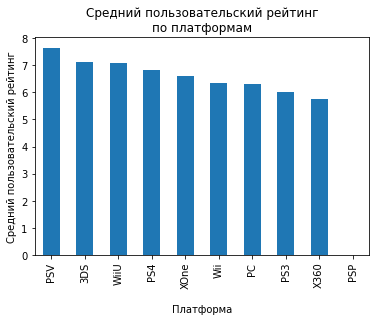

In [47]:
# Для иллюстрации сгруппируем данные по платформам и вычислим средний пользовательский рейтинг для каждой из них.
user_score_platform = df.groupby('platform')['user_score'].mean().sort_values(ascending=False)

user_score_platform.plot(kind='bar')
plt.xlabel('\nПлатформа')
plt.ylabel('Средний пользовательский рейтинг')
plt.title('Средний пользовательский рейтинг\nпо платформам')
plt.show()

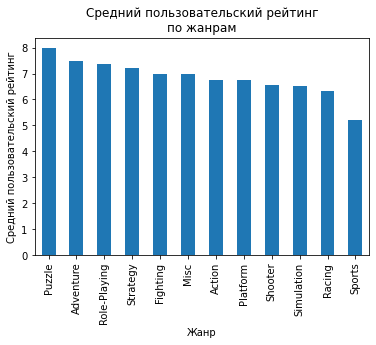

In [48]:
# Проиллюстрируем то же и для жанров.
user_score_genre = df.groupby('genre')['user_score'].mean().sort_values(ascending=False)

user_score_genre.plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Средний пользовательский рейтинг')
plt.title('Средний пользовательский рейтинг\nпо жанрам')
plt.show()

2.8711147985105864e-19 — число в экспоненциальном виде, где -19 — показатель степени. Значит, оно эквивалентно очень малому числу, близкому к нулю.

Это говорит о том, что у нас есть статистически значимымые доказательства, позволяющие отвергнуть нулевую гипотезу. Потому что вероятность получить наблюдаемое или ещё более далёкое от предполагаемого в нулевой гипотезе значения при условии, что нулевая гипотеза верна, крайне низка. Это позволяет нам отвергнуть нулевую гипотезу.

Поэтому можно сказать, что **средние пользовательские рейтинги жанров Action и Sports одинаковые.**

# Общий вывод
- Актуальные данные для нас — начиная с 2014 года, после выпуска платформ нового поколения.
- По продажам доминирует PS4. Затем идут Xbox One и 3DS. Падают продажи на платформах прошлого поколения, портитивных консолях (кроме 3DS) и на WiiU (платформа отживает своё).
- В случае PS4 и Xbox One можно говорить о наличии тенденции к лёгкой отрицательной корреляции между продажами и оценками пользователей, и умеренной положительной корреляции между продажами и оценками критиков. 3DS неожиданно имеет небольшую положительную корреляцию между оценками пользователей и суммарными продажами. Это нетипично по сравнению с двумя предыдущими платформами. В целом ситуация с отзывами критиков и пользователей для PS4 и Xbox One типична и для остальных платформ, кроме приставок Nintendo.
- PS4 является самой популярной платформой в мире, а также на рынках Северной Америки и Европы. На рынке последней её отрыв существенно велик. В Северной Америке ощущается региональная специфика: Xbox One популярен на родине, хоть и уступает PS4. Ещё сильнее региональная специфика продемонстрирована на рынке Японии. Топ-5 платформ состоит исключительно из японских консолей, в лидерах — 3DS. Это может объяснять её третью позицию по продажам игр в мире.
- Самые прибыльные стабильные жанры — Shooter, Sports, Platform, Fighting, RPG и Simulation. При этом Shooter лидирует с большим отрывом. Самые стабильно неприбыльные — Strategy, Puzzle и Adventure.
- Европа и Северная Америка похожи и в контексте продаж игр по возрастному рейтингу. На первом месте — игры для взрослой аудитории. В Японии же — игры для подростков, что обусловлено цензурной спецификой и системой рейтингов игр, которые в данном наборе данных актуальны только для Северной Америки.
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Как и средние пользовательские рейтинги жанров Action и Sports.

# Рекомендации
- Ставку стоит делать на PS4, Xbox One. Это самые актуальные на текущий момент платформы с самыми большими продажами на рынке. На них стоит сделать ставку. Самый продаваемый жанр — шутер. На него и стоит сделать акцент. Лучшие регионы для продаж — Северная Америка и Европа. В том числе и из-за спокойной продажи там игр с рейтингом «для взрослых» (шутеры в основном продаются именно с таким рейтингом), чего не скажешь о Японии. Влияние на продажи оказывают и отзывы. Отзывы критиков. Их тоже следует иметь. вв иду при планировании рекламных кампаний.
- Также важную роль играют эксклюзивы и большие проекты, про успех которых всё относительно известно. Именно они составляют большую часть продаж.
- При этом нужно учитывать региональные особенности. В США это погоня Xbox One за PS4, подогреваемая исторической предрасположенностью к этой платформе в регионе. В Японии та же ситуация, здесь осоенно сильны позиции платформ от Nintendo и Sony, а также свои предпочтения в плане жанров.
- Стоит учитывать спад продаж в 2016 году. Он коснулся всего мирового рынка.